In [8]:
import dlib
import cv2 as cv
import glob
import os
import matplotlib.pyplot as plt

In [9]:
detector = dlib.simple_object_detector("data/clock_detector.svm")
shape_predictor = dlib.shape_predictor("data/clock_point_detector.dat")

In [10]:
print("Testing accuracy: {}".format(
    dlib.test_simple_object_detector("data/relogios_teste.xml", "data/clock_detector.svm")))

Testing accuracy: precision: 0.818182, recall: 0.25, average precision: 0.211279


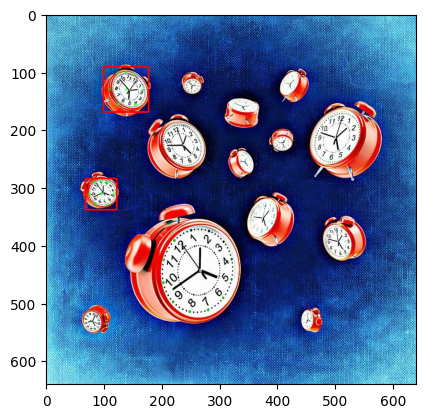

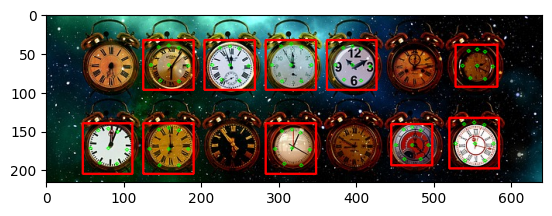

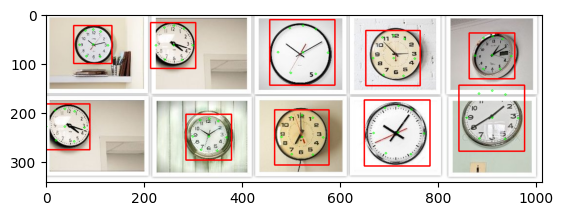

In [13]:
for img_file in glob.glob(os.path.join("data/relogios_teste", "*.jpg")):
    img = cv.imread(img_file)
    clocks = detector(img, 2)

    for clock in clocks:
        x_min, y_max = clock.tl_corner().x, clock.tl_corner().y
        x_max, y_min = clock.br_corner().x, clock.br_corner().y

        detected_points = shape_predictor(img, clock)
    
        for i in range(detected_points.num_parts):
            (x, y) = detected_points.part(i).x, detected_points.part(i).y
            cv.circle(img, (x,y), 2, (0,255,0), 1, cv.LINE_AA)

        cv.rectangle(img, (x_min, y_max), (x_max, y_min), (0,0,255), 2)

    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()
    
